In [2]:
import os
import math
import numpy as np
import pickle as p
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
def load_CIFAR_batch(filename):
    """ 导入单批次的cifar数据 """  
    with open(filename, 'rb')as f:
        data_dict = p.load(f, encoding='bytes')
        images= data_dict[b'data']
        labels = data_dict[b'labels']
                
        # 把原始数据结构调整为: BCWH
        images = images.reshape(10000, 3, 32, 32)
        # tensorflow处理图像数据的结构：BWHC
        # 把通道数据C移动到最后一个维度
        images = images.transpose (0,2,3,1)
     
        labels = np.array(labels)
        
        return images, labels


In [4]:
def load_CIFAR_data(data_dir):
    """导入CIFAR数据集"""
 
    images_train=[]
    labels_train=[]
    for i in range(5):
        f=os.path.join(data_dir,'data_batch_%d' % (i+1))
        print('loading ',f)
        # 调用 load_CIFAR_batch( )获得批量的图像及其对应的标签
        image_batch,label_batch=load_CIFAR_batch(f)
        images_train.append(image_batch)
        labels_train.append(label_batch)
        Xtrain=np.concatenate(images_train)
        Ytrain=np.concatenate(labels_train)
        del image_batch ,label_batch
    
    Xtest,Ytest=load_CIFAR_batch(os.path.join(data_dir,'test_batch'))
    print('finished loadding CIFAR-10 data')
    
    # 返回训练集的图像和标签，测试集的图像和标签
    return (Xtrain,Ytrain),(Xtest,Ytest)

In [7]:
data_dir = '../../play_with_personal_model/data/cifar-10-batches-py/'
(x_train,y_train),(x_test,y_test) = load_CIFAR_data(data_dir)

loading  ../../play_with_personal_model/data/cifar-10-batches-py/data_batch_1
loading  ../../play_with_personal_model/data/cifar-10-batches-py/data_batch_2
loading  ../../play_with_personal_model/data/cifar-10-batches-py/data_batch_3
loading  ../../play_with_personal_model/data/cifar-10-batches-py/data_batch_4
loading  ../../play_with_personal_model/data/cifar-10-batches-py/data_batch_5
finished loadding CIFAR-10 data


In [8]:
label_dict = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer",
              5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}


def plot_images_labels(images, labels, num):
    total = len(images)
    fig = plt.gcf()
    fig.set_size_inches(15, math.ceil(num / 10) * 7)
    for i in range(0, num):
        choose_n = np.random.randint(0, total)
        
        ax = plt.subplot(math.ceil(num / 5), 5, 1 + i)
        ax.imshow(images[choose_n], cmap='binary')
        title = label_dict[labels[choose_n]]
        ax.set_title(title, fontsize=10)        
    plt.show()

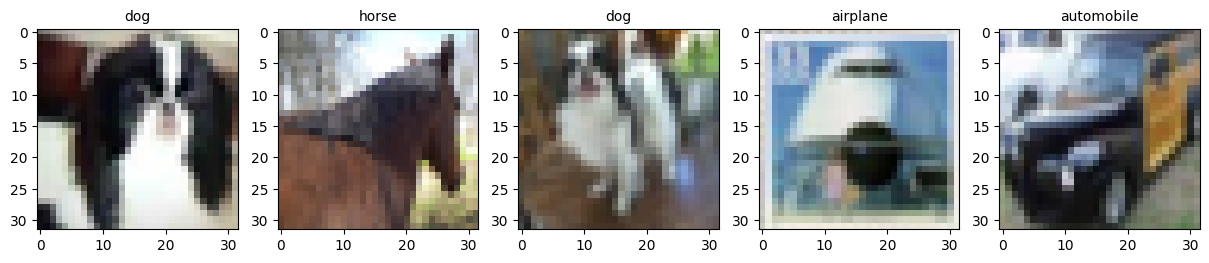

In [9]:
plot_images_labels(x_train, y_train, 5)

In [22]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

train_num = len(x_train)
num_classes = 10

learning_rate = 0.0002
batch_size = 64
training_steps = 40000
display_step = 1000

In [23]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.shuffle(5000).repeat(training_steps).batch(batch_size).prefetch(buffer_size=AUTOTUNE)

In [10]:
import tensorflow as tf

class CNNNet(tf.keras.Model):
    def __init__(self):
        super(CNNNet, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=16, kernel_size=5, strides=1, activation='relu')
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)
        self.conv2 = tf.keras.layers.Conv2D(filters=36, kernel_size=3, strides=1, activation='relu')
        self.pool2 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)
        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(128, activation='relu')
        self.fc2 = tf.keras.layers.Dense(10)

    def call(self, x):
        x = self.pool1(self.conv1(x))
        x = self.pool2(self.conv2(x))
        x = self.flatten(x)
        x = self.fc1(x)
        x = tf.nn.relu(x)
        x = self.fc2(x)
        return x

In [11]:
import tensorflow as tf

class Net(tf.keras.Model):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=16, kernel_size=5)
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)
        self.conv2 = tf.keras.layers.Conv2D(filters=36, kernel_size=5)
        self.pool2 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)
        self.aap = tf.keras.layers.GlobalAveragePooling2D()
        self.fc3 = tf.keras.layers.Dense(10)

    def call(self, x):
        x = self.pool1(tf.nn.relu(self.conv1(x)))
        x = self.pool2(tf.nn.relu(self.conv2(x)))
        x = self.aap(x)
        x = self.fc3(x)
        return x

In [12]:
import tensorflow as tf

class LeNet(tf.keras.Model):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=6, kernel_size=5)
        self.conv2 = tf.keras.layers.Conv2D(filters=16, kernel_size=5)
        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(120, activation='relu')
        self.fc2 = tf.keras.layers.Dense(84, activation='relu')
        self.fc3 = tf.keras.layers.Dense(10)

    def call(self, x):
        out = tf.nn.relu(self.conv1(x))
        out = tf.keras.layers.MaxPool2D(pool_size=2)(out)
        out = tf.nn.relu(self.conv2(out))
        out = tf.keras.layers.MaxPool2D(pool_size=2)(out)
        out = self.flatten(out)
        out = self.fc1(out)
        out = tf.nn.relu(out)
        out = self.fc2(out)
        out = tf.nn.relu(out)
        out = self.fc3(out)
        return out

In [13]:
import tensorflow as tf

cfg = {
    'VGG16': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'VGG19': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}

class VGG(tf.keras.Model):
    def __init__(self, vgg_name):
        super(VGG, self).__init__()
        self.features = self._make_layers(cfg[vgg_name])
        self.flatten = tf.keras.layers.Flatten()
        self.classifier = tf.keras.layers.Dense(10)

    def call(self, x):
        out = self.features(x)
        out = self.flatten(out)
        out = self.classifier(out)
        return out

    def _make_layers(self, cfg):
        layers = []
        in_channels = 3
        for x in cfg:
            if x == 'M':
                layers += [tf.keras.layers.MaxPool2D(pool_size=2, strides=2)]
            else:
                layers += [tf.keras.layers.Conv2D(filters=x, kernel_size=3, padding='same'),
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.ReLU()]
                in_channels = x
        layers += [tf.keras.layers.AvgPool2D(pool_size=1)]
        return tf.keras.Sequential(layers)

In [14]:
# Model
print('==> Building model..')
net1 = CNNNet()
net2=Net()
net3=LeNet()
net4 = VGG('VGG16')

==> Building model..
Metal device set to: Apple M2 Pro


2023-11-27 00:17:47.995893: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-27 00:17:47.996153: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [21]:
print(x_train.shape)

(50000, 32, 32, 3)


In [24]:
import tensorflow as tf
from collections import Counter

#定义一些超参数 
BATCHSIZE=100
DOWNLOAD_MNIST=False
EPOCHES=20
LR=0.001

import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import numpy as np
from collections import Counter

# 假设net1, net2, net3已经定义并编译
mlps = [net1, net2, net3]

optimizer = Adam(learning_rate=LR)
loss_function = SparseCategoricalCrossentropy()

for ep in range(EPOCHES):
    for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
        with tf.GradientTape() as tape:
            losses = []
            for mlp in mlps:
                out = mlp(batch_x, training=True)
                loss = loss_function(batch_y, out)
                losses.append(loss)
            total_loss = tf.reduce_sum(losses)
        
        # 计算梯度并更新
        gradients = tape.gradient(total_loss, mlp.trainable_variables)
        optimizer.apply_gradients(zip(gradients, mlp.trainable_variables))
        
    pre = []
    vote_correct = 0
    mlps_correct = [0 for _ in range(len(mlps))]
    for img, label in zip(x_test,y_test):
        for i, mlp in enumerate(mlps):
            out = mlp(img, training=False)
            prediction = tf.argmax(out, axis=1)
            pre_num = prediction.numpy()
            mlps_correct[i] += (pre_num == label.numpy()).sum()
            pre.append(pre_num)
        
        arr = np.array(pre)
        pre.clear()
        result = [Counter(arr[:,i]).most_common(1)[0][0] for i in range(BATCHSIZE)]
        vote_correct += (result == label.numpy()).sum()
    
    print("epoch:" + str(ep) + "集成模型的正确率" + str(vote_correct/len(testloader)))
    for idx, correct in enumerate(mlps_correct):
        print("模型" + str(idx) + "的正确率为：" + str(correct/len(testloader)))

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x64x1x10xi1>'


ValueError: Exception encountered when calling layer "cnn_net" "                 f"(type CNNNet).

Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (32, 32, 3)

Call arguments received by layer "cnn_net" "                 f"(type CNNNet):
  • x=tf.Tensor(shape=(32, 32, 3), dtype=float32)